In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.gridliner 
# import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.mpl.ticker as cticker
import cartopy.io.shapereader as shpreader

In [3]:
file = './HadISST_sst.nc'
dataset = nc.Dataset(file)
# print(dataset.variables.keys())

longitude, latitude = dataset.variables['longitude'],dataset.variables['latitude']
time = dataset.variables['time']
sst =dataset.variables['sst']

In [4]:
# 时间 1982年到1997年12月共计 16年 总共192个月
# time[:].data[1343:1535] % 365
# 时间  1998年到2021年 共计24年总共288个月
# time[:].data[1535:1823] % 365

sum_month = np.zeros(sst[:1].data.shape, dtype=float, order='C') # 创建空矩阵
num_month = time[:].data.shape[0] # 创建空时间矩阵
num_month_1997to1982 = (1998 - 1982) * 12 #计算1982年1月到1997年12月的192月数
num_month_2021to1998 = (2022 - 1998) * 12 #计算1998年1月到2021年12月的288月数

sum_month = np.zeros(sst[:1].data[0][44:136,:].shape, dtype=float, order='C') # 创建空矩阵
sum_month_1982to1997 = sum_month
count1 = 0
ls_first = []
mean_1982to1997 = sum_month
for i in range(1343, 1343+num_month_1997to1982): 
    temp_pre = sst[i:i+1].data[0][44:136,:]
#     ls_first.append(sst[i:i+1].data[0][:1,-1:])
    sum_month_1982to1997 += temp_pre
    count1 += 1
mean_1982to1997 = sum_month_1982to1997 / num_month_1997to1982

sum_month = np.zeros(sst[:1].data[0][44:136,:].shape, dtype=float, order='C') # 创建空矩阵
sum_month_1998to2021 = sum_month
count2 = 0
ls_first = []
mean_1998to2021 = sum_month
for i in range(1534, 1534+num_month_2021to1998): 
    temp_pre = sst[i:i+1].data[0][44:136,:]
#     ls_first.append(sst[i:i+1].data[0][:1,-1:])
    sum_month_1998to2021 += temp_pre
    count2 += 1
mean_1998to2021 = sum_month_1998to2021 / num_month_2021to1998

diff = mean_1998to2021 - mean_1982to1997

In [23]:
1535+288

1823

1.4641342692905006 -0.6092177894380377


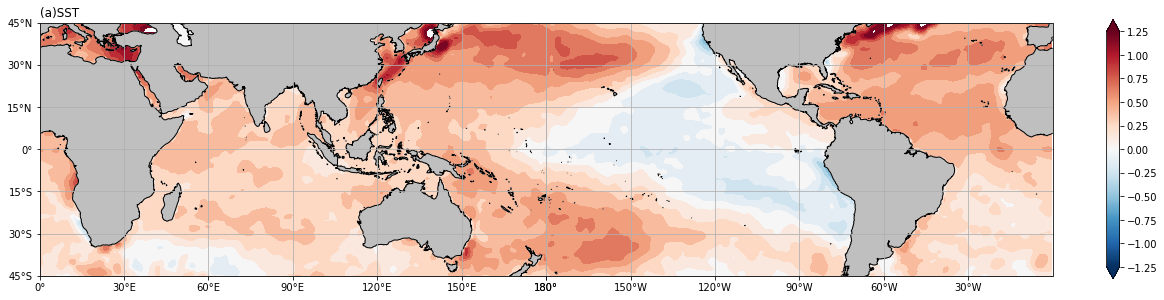

In [5]:
from matplotlib import colors,cm
import matplotlib as mpl
import cmaps
from matplotlib.colors import ListedColormap 
# 设置经纬度
lon = longitude[:].data
lat = latitude[44:136].data
# 调整经纬度 向东偏移180
lon_pacific = lon[:] + 180
a, b = np.hsplit(diff, [179])
diff_pacific_contre = np.concatenate([b, a], axis=1) # 转换为以太平洋为中心的数据
print(diff_pacific_contre.max(), diff_pacific_contre.min())


fig = plt.figure(figsize=(15,5))


proj = ccrs.PlateCarree(central_longitude=180)
leftlon, rightlon, lowerlat, upperlat = (-180,181, -45,45)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
fig_ax1 = fig.add_axes([0, 0, 1, 1],projection = proj)

fig_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
land = cfeature.NaturalEarthFeature('physical','land','50m',edgecolor='face', facecolor=cfeature.COLORS['land'])
fig_ax1.add_feature(land,facecolor='0.75')
fig_ax1.add_feature(cfeature.COASTLINE.with_scale('50m'))
fig_ax1.set_xticks(np.arange(-180,181,30), crs=ccrs.PlateCarree())
fig_ax1.set_yticks(np.arange(-45,46,15), crs=ccrs.PlateCarree())
fig_ax1.grid() # 增加网格

fig_ax1.xaxis.set_major_formatter(lon_formatter)
fig_ax1.yaxis.set_major_formatter(lat_formatter)

fig_ax1.set_title('(a)SST',loc='left',fontsize =12)
# fig_ax1.contourf(lon, lat, diff, 
#                 levels=bins, 
# #                 color=['blue','red','yellow','black'],
# #                 hatches='///',
#                 transform=cartopy.crs.PlateCarree(),
#                cmap=plt.cm.RdBu_r)
cont = fig_ax1.contourf(lon_pacific, lat, diff_pacific_contre, 
                 levels=np.arange(-1.25,1.25,0.125),
                        zorder=0,
                transform=ccrs.PlateCarree(),cmap=plt.cm.RdBu_r)
# fig_ax1.contourf(lon, lat, diff,levels=[0,0.05,1], zorder=1, hatches=['....',None],colors="none", transform=ccrs.PlateCarree())

norm = colors.Normalize(vmin=-1.25, vmax=1.25)    #确定colormap的最大最小值

# cmap=plt.cm.RdBu_r  #引用NCL的colormap

# newcolors=cmap(np.linspace(-1.25,1.25,8))#分片操作，生成0到1的12个数据间隔的数组   

# newcmap=ListedColormap(newcolors[::1])  #重构为新的colormap

fc1=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap=plt.cm.RdBu_r),
#                  cax = fig.add_axes([0,0,0.05,0.9]),
                 orientation='vertical',
                 ticks=np.arange(-1.25,1.26,0.25).tolist(),                                                    
                 extend='both',
                fraction=0.012) 

# plt.colorbar(cont,fraction=0.012)

plt.savefig("HadISST_sst.png",dpi=300,bbox_inches='tight')
plt.show()

In [13]:
np.tile(np.arange(4), 2)

array([0, 1, 2, 3, 0, 1, 2, 3])

In [16]:
np.arange(-1.25,1.25,0.125).tolist()

[-1.25,
 -1.125,
 -1.0,
 -0.875,
 -0.75,
 -0.625,
 -0.5,
 -0.375,
 -0.25,
 -0.125,
 0.0,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 1.0,
 1.125]